In [1]:
import pandas as pd
import numpy as np

# this will compile a Stan model and therefore may take some time
import GPrecords

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0ac32fb577916b49f3ef6eb91d7eb088 NOW.


In [2]:
import bokeh.plotting as plt
from bokeh.models import ColumnDataSource, HoverTool, Band
from bokeh.palettes import PiYG3 as colors
colors[1] = "DarkGray"

from bokeh.resources import CDN, INLINE
import bokeh.embed

plt.output_notebook()

Loading BokehJS ...

# Data
I manually extracted the following data from [Wikipedia](https://en.wikipedia.org/wiki/Men%27s_100_metres_world_record_progression#Records_from_1977) on 05.05.2018. I restricted myself to records that were automatically recorded up to a precision of 0.01 seconds.

In [3]:
data = pd.read_csv("100m_records_only.csv", sep=';', skiprows=2, parse_dates=['Date'])
data

,Time,Athlete,Nationality,Location of race,Date
0,10.60,Donald Lippincott,USA,Stockholm,1912-07-06
1,10.60,Jackson Scholz,USA,Stockholm,1920-09-16
2,10.40,Charley Paddock,USA,Redlands,1921-04-23
3,10.40,Eddie Tolan,USA,Stockholm,1929-08-08
4,10.40,Eddie Tolan,USA,Copenhagen,1929-08-25
5,10.30,Percy Williams,CAN,Toronto,1930-08-09
6,10.30,Eddie Tolan,USA,Los Angeles,1932-08-01
7,10.30,Ralph Metcalfe,USA,Budapest,1933-08-12
8,10.30,Eulace Peacock,USA,Oslo,1934-08-06
9,10.30,Chris Berger,NED,Amsterdam,1934-08-26


Now transform the data so that you have at least one data point per year indicating that no one in that year achieved a record. If there were several records in one year, list them in the order they appear, but associate only with the year.

In [4]:
yearly = data.set_index('Date')
yearly.index = yearly.index.map(lambda d: d.year)
years = np.arange(data.Date.iloc[0].year, pd.datetime.today().year)
for year in years[1:]:
    if year not in yearly.index:
        yearly.loc[year] = [yearly.loc[year-1].Time.min(), '-', '-', '-']

yearly['negyear'] = -yearly.index
yearly.sort_values(['negyear', 'Time'], ascending=False, inplace=True)
yearly

,Time,Athlete,Nationality,Location of race,negyear
Date,,,,,
1912,10.60,Donald Lippincott,USA,Stockholm,-1912
1913,10.60,-,-,-,-1913
1914,10.60,-,-,-,-1914
1915,10.60,-,-,-,-1915
1916,10.60,-,-,-,-1916
1917,10.60,-,-,-,-1917
1918,10.60,-,-,-,-1918
1919,10.60,-,-,-,-1919
1920,10.60,Jackson Scholz,USA,Stockholm,-1920


## Athletes who attempted a world record for each year
I'm only interested in the absolute top of athletes - those that really attempt to break world records. I will simply assume that these are the athletes running, for example, in an Olympic final of 8 athletes. So I will only consider the 8 top athletes per year. I further assume that each athlete is among the top for about 9 years. 3 before (including) and 6 after their first world record, if they had one.

In [5]:
# length of top career
L1 = 3
L2 = 6
L = L1 + L2

# number of athletes per year
AY = 8

# collection of all athletes
athletes = pd.Series(data.Athlete.unique())
athletes.index = athletes.index + 1
recordholders = athletes.copy()

# add athlete index to yearly data
def getaind(name):
    return 0 if not np.any(athletes == name) else athletes[athletes == name].index[0]
yearly['aind'] = yearly.Athlete.map(getaind)

# active athletes
active = pd.DataFrame(np.zeros((years.size, athletes.size), dtype=bool), 
                      index=years, columns=athletes.index)

# fill in active period for each world record holder
for athlete in athletes.index:
    # get year of first world record
    year = yearly[yearly.Athlete == athletes.loc[athlete]].index.min()
    
    active.loc[slice(year - L1 + 1, year + L2), athlete] = True

# add anonymous athletes to get AY athletes per year
for year in years:
    while active.loc[year].sum() < AY:
        newa = athletes.index.max() + 1
        athletes.loc[newa] = 'anonymous'
        active[newa] = False
        active.loc[slice(year, year + L - 1), newa] = True

# the above construction will have lead to years with more than 8 athletes
# go through these years and remove random anonymous athletes from them to get exactly AY
for year in active[active.sum(axis=1) > AY].index:
    aths = active.loc[year]
    aths = aths[aths].index
    
    toomany = aths.size - AY
    
    aths = aths.difference(recordholders.index)
    aths = np.random.permutation(aths)[:toomany]
    
    active.loc[year, aths] = False
    
    # if there are still more than AY athletes, also remove some non-anonymous
    if active.loc[year].sum() > AY:
        aths = active.loc[year]
        aths = aths[aths].index
        toomany = aths.size - AY
        aths = np.random.permutation(aths)[:toomany]
        
        active.loc[year, aths] = False
    
# get array with indices of athletes that are active at each data point
activeathletes = pd.concat(
    [pd.Series(athletes[active.loc[year]].index, name=year) 
     for year in yearly.index], axis=1).T

# Infer hidden world performance index

In [6]:
standata = dict(
    A=athletes.size, N=yearly.shape[0], AY=AY,
    athletes=activeathletes, years=yearly.index, 
    records=yearly.Time, recordsa=yearly.aind, astd_std=0.1)

fit = GPrecords.sm.sampling(standata, iter=2000, chains=4, 
                            init=lambda: GPrecords.init(standata['N'], standata['A'], data.Time.max()))

/home/bitzer/miniconda3/envs/100m/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
print(fit.stansummary())

Inference for Stan model: anon_model_0ac32fb577916b49f3ef6eb91d7eb088.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
average         10.46    0.02   0.52   9.39  10.19  10.47  10.73   11.6    543   1.01
rho_raw          0.81    0.04   0.64  -0.44   0.33   0.89   1.27   1.91    248   1.01
alpha            0.78    0.02   0.49   0.22   0.42   0.65   1.02   2.05    592    1.0
eta[0]           0.89    0.03   0.82  -0.65   0.33   0.86    1.4   2.68    722   1.01
eta[1]          -0.84    0.03   0.78  -2.28  -1.34  -0.87  -0.39   0.84    617   1.01
eta[2]          -0.14    0.02   0.84  -1.84   -0.7  -0.13   0.44   1.46   1456    1.0
eta[3]         4.7e-3    0.02   0.98  -1.93  -0.66   0.01   0.65   2.01   2321    1.0
eta[4]           0.04    0.02    1.0   -1.9  -0.64   0.05   0.73   2.03   2206    1.0
eta[5]           0.05    0.02   0.95 

In [8]:
fit.plot('ameans');

In [9]:
samples = fit.extract(permuted=False, inc_warmup=True)
get_df = lambda s: pd.DataFrame()
samples = pd.concat(
    [pd.DataFrame(samples[:, c, :], columns=fit.flatnames + ['lp__']) for c in range(4)],
    keys=np.arange(4), names=['chain', 'sample'])

In [10]:
fit.model_pars

['average',
 'rho_raw',
 'alpha',
 'eta',
 'ability_std',
 'abilities',
 'astds_raw',
 'rho',
 'ameans',
 'astds',
 'f']

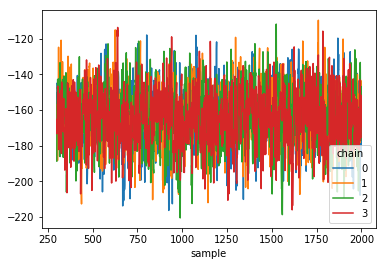

In [11]:
samples['lp__'].unstack('chain').loc[slice(300, None)].plot();

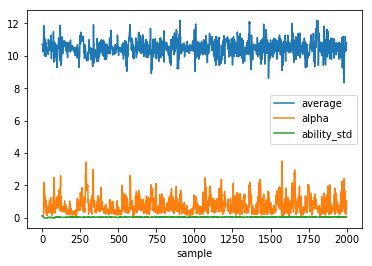

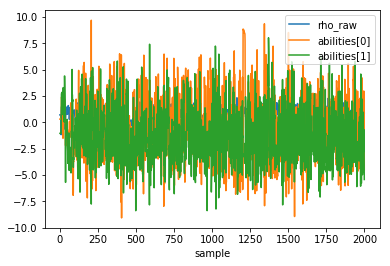

In [12]:
samples.loc[3, ['average', 'alpha', 'ability_std']].plot();
samples.loc[3, ['rho_raw', 'abilities[0]', 'abilities[1]']].plot();

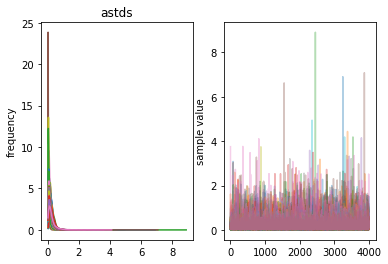

In [13]:
fit.plot('astds');

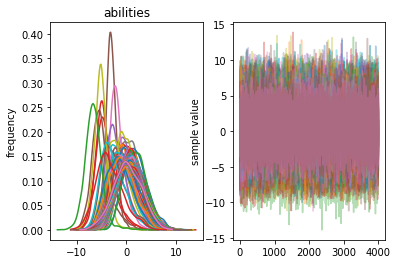

In [14]:
fit.plot('abilities');

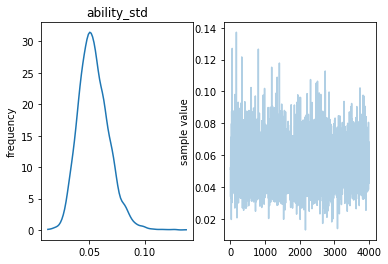

In [15]:
fit.plot('ability_std');

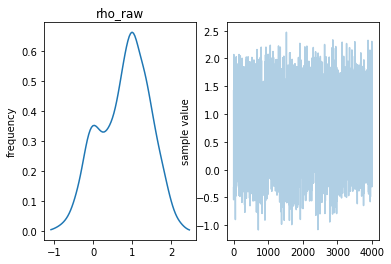

In [16]:
fit.plot('rho_raw');

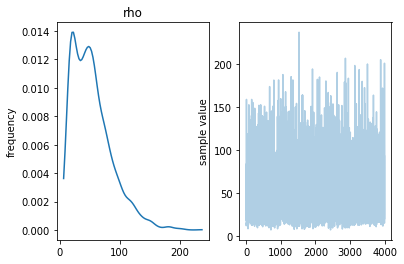

In [17]:
fit.plot('rho');

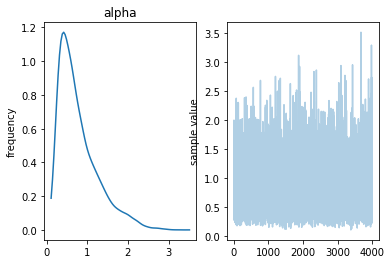

In [18]:
fit.plot('alpha');

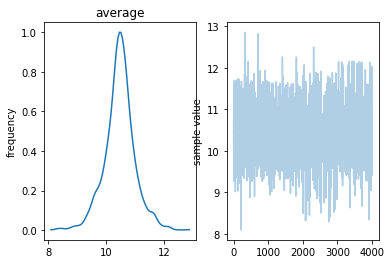

In [19]:
fit.plot('average');

# Make the bokeh plot

In [20]:
quantiles = GPrecords.wpi_quantiles(fit, yearly.index)

In [21]:
source = ColumnDataSource(dict(
    year=data.Date.map(lambda d: d.year),
    time=data.Time,
    athlete=data.Athlete,
    place=data["Location of race"]))

In [22]:
gpsrc = ColumnDataSource(dict(year=quantiles.index, time=quantiles[0.5], 
                              lower=quantiles[0.025], upper=quantiles[0.975]))

In [23]:
standardtt = [
    ("year", "@year"),
    ("time", "@time{%3.2f s}"),
    ("athlete", "@athlete"),
    ("place", "@place")]

tooltips = standardtt

In [24]:
ax = plt.figure(title='100m world records',plot_width=480, plot_height=320,
                tools="pan,box_zoom,reset", y_range=(9.5, 11))
ax.line("year", "time", source=gpsrc, color=colors[1], line_width=3)
band = Band(base='year', lower='lower', upper='upper', source=gpsrc, level='underlay',
            fill_alpha=0.3, line_width=1, fill_color=colors[1])
ax.add_layout(band)

ax.circle("year", "time", color=colors[0], source=source, size=7)

ax.xaxis.axis_label = "year"
ax.yaxis.axis_label = "time (s)"

hover = HoverTool(tooltips=tooltips)
hover.formatters = { "time": "printf"}
ax.add_tools(hover)

h = plt.show(ax, notebook_handle=True)

In [26]:
js, tag = bokeh.embed.autoload_static(
    ax, INLINE, "http://sbitzer.eu/wp-content/uploads/2018/05/100m_world_records.js")
with open('100m_world_records.js', 'w') as f:
    f.write(js)
print(tag)


<script
    src="http://sbitzer.eu/wp-content/uploads/2018/05/100m_world_records.js"
    id="5937a2ab-c5b3-4a52-b9c3-0edc0595daa1"
    data-bokeh-model-id="15135d09-b658-4fe9-9151-0a31de4ff511"
    data-bokeh-doc-id="04864e79-c07e-47a3-92f0-d5d504488b77"
></script>


NOTE: You'll need to upload the generated `100m_yearly_bests.js` into the path set above and include the `script` tag in the html-document wherever you want the figure to be. When you update the `js`-file, you'll also need to update the contents of the `script` tag.

Usually I would use `CDN` instead of `INLINE`, which makes the script itself leaner and loads all bokeh stuff from the bokeh servers (and thus allows browser caching). I didn't do that here, because the bokeh css-definitions set the tooltip font color to `default` which makes tooltip values unreadable on my website. To solve this I manually changed the color of `bk-tooltip-row-value` to black by simply searching for the CSS class string in the generated `js`-file in which all bokeh CSS definitions are included.

# Store results for later reference

In [31]:
file = pd.datetime.now().strftime('stanresults_%Y%m%d%H%M.h5')
with pd.HDFStore(file, 'w') as store:
    store['samples'] = samples
    store['quantiles'] = quantiles
    store['model'] = pd.Series(GPrecords.modelcode)